<h2>Diagnostics</h2>


In [43]:
import sys
sys.path

['/home/johann/Workspace/colette',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/johann/.virtualenvs/colette/lib/python3.8/site-packages',
 '/home/johann/.virtualenvs/colette/lib/python3.8/site-packages/IPython/extensions',
 '/home/johann/.ipython']

In [44]:
sys.executable

'/home/johann/.virtualenvs/colette/bin/python3'

<h2>Goal: To develop a decorator that will wrap a Panel widget such that it can be hidden/unhidden with a toggle button. The label of the toggle button (and possibly color) will be specified by an argument provided to the decorator<h2>

In [45]:
from functools import wraps

<h2>Example #1 of a Practical Decorator<h2>

In [46]:
def my_timer(orig_func):
    import time
    
    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result
    
    return wrapper
        

In [47]:
@my_timer
def display_info(name, age):
    print('Function display_info ran with arguments ({}, {})'.format(name, age))

In [48]:
display_info("Mac", 20)

Function display_info ran with arguments (Mac, 20)
display_info ran in: 0.00022077560424804688 sec


<h2>Example #2 of a Practical Decorator</h2>

In [49]:
def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)


    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))

        return orig_func(*args, **kwargs)

    return wrapper

In [50]:
@my_logger
def display_info2(name, age):
    print('Function display_info ran with arguments ({}, {})'.format(name, age))

In [51]:
display_info2("Ellis", 24)

Function display_info ran with arguments (Ellis, 24)


<h2>Stacking Example #1 and Example #2</h2>

In [52]:
@my_logger
@my_timer
def display_info_stacked(name, age):
    print('Function display_info ran with arguments ({}, {})'.format(name, age))

In [53]:
display_info_stacked("JJ", 23)

Function display_info ran with arguments (JJ, 23)
display_info_stacked ran in: 0.0001380443572998047 sec


<h2>Example of a Parameterized Decorator</h2>

<h3>This decorator runs a function n times, and gets the average of those runs. </h3>

In [54]:
from time import perf_counter
def decorator_factory(loops_num):
    
    def decorating(fn):
        '''
        For this particular example we will be using num and not
        *args, as to make it a bit more understandable. Usually *args
        could be preferable as its more flexible.
        '''
        
        def inner(num):
            
            total_elapsed = 0
            
            for i in range(loops_num):
                start = perf_counter()
                result = fn(num)
                end = perf_counter()
                total_elapsed += end - start
            
            avg_run_time = total_elapsed/loops_num
            print('result is', result)
            print('num of loops is', loops_num)
            print('avg time elapsed', avg_run_time)
        
        return inner
    return decorating

    

<h3>Using Parameterized Decorator</h3>

In [55]:
@decorator_factory(200)
def calc_factorial(num):
    if num < 0:
        raise ValueError('Please use a number not smaller than 0')
    product = 1
    for i in range(num):
        product = product * (i + 1)
    return product

In [56]:
calc_factorial(2)

result is 2
num of loops is 200
avg time elapsed 2.6152899772569074e-06


<h1>Development of Toggling Decorator</h1>

In [57]:
# Modules, libraries
import panel as pn
import param as pm
pn.extension()

<h3>Sample Function That Must Be Togglized</h3>

PNG(str)
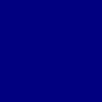

In [58]:
def some_panel_widget():
    return pn.pane.PNG('blue_square.png')

some_panel_widget()

<h3>Togglizer Boilerplate</h3>

In [59]:
# Copying over Toggle boilerplate from Model 3
toggle = pn.widgets.Toggle(name='Show Sample Widget', button_type='success')
@pn.depends(toggle)
def toggle_watch(x):
    if x:
        '''
        The function is here. It's what's returned
        '''

        return some_panel_widget

    else:
        return None

sample_widget_plot = pn.Column(pn.Column(toggle), toggle_watch)


In [60]:
sample_widget_plot

Column
    [0] Column
        [0] Toggle(button_type='success', name='Show Sample Widget')
    [1] ParamFunction(function)

In [61]:
type(sample_widget_plot)

panel.layout.base.Column

In [62]:
from functools import wraps


def togglize(toggle_name):  
    
    def decorator_function(original_function):
        
        @wraps(original_function) # So we can stack decorators. 
        def wrapper_function(*args, **kwargs):
            '''
            In this block are the boilerplate
            for the actual togglizer 
            '''

            toggle = pn.widgets.Toggle(name=toggle_name, button_type='success')
            @pn.depends(toggle)
            def toggle_watch(x):
                if x:
                    '''
                    The original function we wanted
                    to decorate is here. It's 
                    what's being returned. 
                    '''

                    return original_function

                else:
                    return None
            
            sample_widget_plot = pn.Column(pn.Column(toggle), toggle_watch)
            return sample_widget_plot


            return result
        return wrapper_function
    return decorator_function

In [67]:
@togglize("Jorts",)
def some_panel_widget2():
    return pn.pane.PNG('blue_square.png')


In [68]:
some_panel_widget2()

Column
    [0] Column
        [0] Toggle(button_type='success', name='Jorts')
    [1] ParamFunction(function)